# Connect to Google Drive and set the folder

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir gp

mkdir: cannot create directory ‘gp’: File exists


In [3]:
!cp /content/drive/MyDrive/CS-7643-EfficiencyLane/gp.py /content/gp

In [4]:
cd gp

/content/gp


In [5]:
!ls -ltr

total 20
drwx------ 11 root root  4096 Apr 23 15:55 data
drwxr-xr-x  2 root root  4096 Apr 23 15:55 __pycache__
-rw-------  1 root root 10478 Apr 23 16:12 gp.py


In [6]:
!cp -r /content/drive/MyDrive/CS-7643-EfficiencyLane/data /content/gp

# Install libraries

In [7]:
!pip install -qq adapters datasets

In [8]:
from gp import setup_dataset

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Loading dataset:citation_intent
Starting to load data...


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating dev split: 0 examples [00:00, ? examples/s]

Finished loading
All unique labels in the dataset: {'Motivation', 'Future', 'Extends', 'Uses', 'CompareOrContrast', 'Background'}
Label Encoder: {'Motivation': 0, 'Future': 1, 'Extends': 2, 'Uses': 3, 'CompareOrContrast': 4, 'Background': 5}


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/1688 [00:00<?, ? examples/s]

Map:   0%|          | 0/139 [00:00<?, ? examples/s]

Map:   0%|          | 0/114 [00:00<?, ? examples/s]

Map:   0%|          | 0/1688 [00:00<?, ? examples/s]

Map:   0%|          | 0/139 [00:00<?, ? examples/s]

Map:   0%|          | 0/114 [00:00<?, ? examples/s]

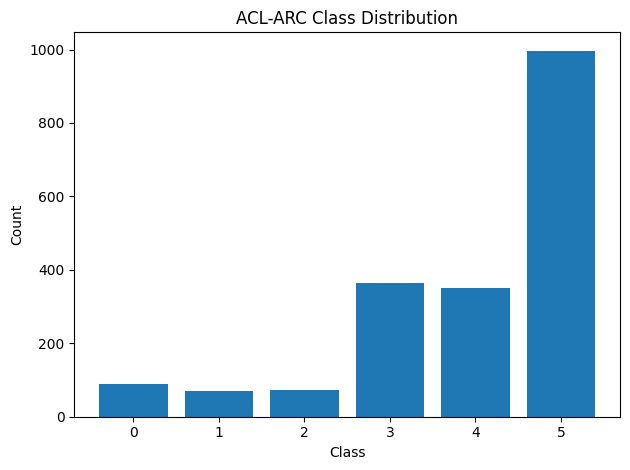

In [9]:

import torch
import matplotlib.pyplot as plt

dataset, num_labels = setup_dataset('citation_intent')

# Determine the class distribution for each split
train_labels = dataset['train']['labels']
dev_labels = dataset['dev']['labels']
test_labels = dataset['test']['labels']

all_labels = torch.cat([train_labels, dev_labels, test_labels])

# Function to calculate class distribution from a tensor
def class_distribution(labels_tensor):
    unique_classes, counts = torch.unique(labels_tensor, return_counts=True)
    return dict(zip(unique_classes.tolist(), counts.tolist()))

# Get class distribution for each split
train_distribution = class_distribution(train_labels)
dev_distribution = class_distribution(dev_labels)
test_distribution = class_distribution(test_labels)
distribution = class_distribution(all_labels)


# Plot for the train split
plt.bar(distribution.keys(), distribution.values())
plt.title("ACL-ARC Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

Loading dataset:sciie
Starting to load data...


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating dev split: 0 examples [00:00, ? examples/s]

Finished loading
All unique labels in the dataset: {'EVALUATE-FOR', 'COMPARE', 'USED-FOR', 'PART-OF', 'FEATURE-OF', 'HYPONYM-OF', 'CONJUNCTION'}
Label Encoder: {'EVALUATE-FOR': 0, 'COMPARE': 1, 'USED-FOR': 2, 'PART-OF': 3, 'FEATURE-OF': 4, 'HYPONYM-OF': 5, 'CONJUNCTION': 6}


Map:   0%|          | 0/3219 [00:00<?, ? examples/s]

Map:   0%|          | 0/974 [00:00<?, ? examples/s]

Map:   0%|          | 0/455 [00:00<?, ? examples/s]

Map:   0%|          | 0/3219 [00:00<?, ? examples/s]

Map:   0%|          | 0/974 [00:00<?, ? examples/s]

Map:   0%|          | 0/455 [00:00<?, ? examples/s]

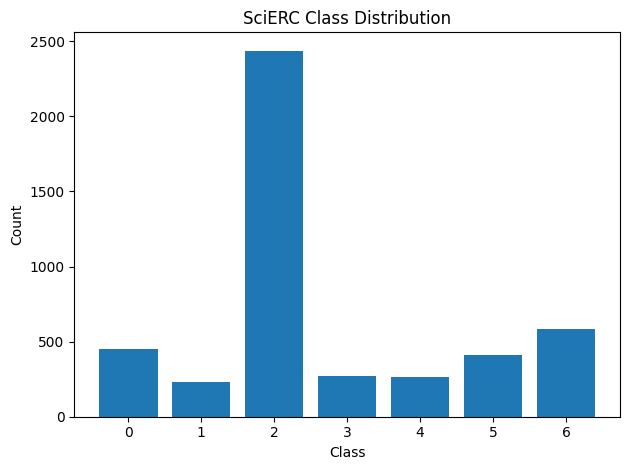

In [10]:
dataset, num_labels = setup_dataset('sciie')

# Determine the class distribution for each split
train_labels = dataset['train']['labels']
dev_labels = dataset['dev']['labels']
test_labels = dataset['test']['labels']

all_labels = torch.cat([train_labels, dev_labels, test_labels])

# Function to calculate class distribution from a tensor
def class_distribution(labels_tensor):
    unique_classes, counts = torch.unique(labels_tensor, return_counts=True)
    return dict(zip(unique_classes.tolist(), counts.tolist()))

# Get class distribution for each split
train_distribution = class_distribution(train_labels)
dev_distribution = class_distribution(dev_labels)
test_distribution = class_distribution(test_labels)
distribution = class_distribution(all_labels)


# Plot for the train split
plt.bar(distribution.keys(), distribution.values())
plt.title("SciERC Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")


plt.tight_layout()
plt.show()